# Aula 6 - EXTRA -  Classificação e Comparação de Modelos

#### O Banco de dados *Default*

Vamos utilizar um banco de dados conhecido, o *Default*. Nele, existem características de pessoas que são ou não inadimplentes.

In [30]:
import pandas as pd

# URL do arquivo Excel raw no GitHub
url = "https://github.com/JWarmenhoven/ISLR-python/raw/master/Notebooks/Data/Default.xlsx"

# Carrega o arquivo Excel em um DataFrame
df = pd.read_excel(url)

df.head()

c:\Users\Luiz Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


Vamos importar os pacotes necessários e fazer novamente o one-hot encoding

In [31]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression # Modelo de regressão logística do sklearn
from sklearn.model_selection import train_test_split # Função para dividir o banco entre treino e teste
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Algumas métricas e relatórios

In [32]:
# Converte as variáveis categóricas em numéricas usando codificação one-hot
df_encoded = pd.get_dummies(df, columns=['default', 'student'], drop_first=True, dtype = int)

df_encoded

,Unnamed: 0,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.625074,0,0
1,2,817.180407,12106.134700,0,1
2,3,1073.549164,31767.138947,0,0
3,4,529.250605,35704.493935,0,0
4,5,785.655883,38463.495879,0,0
...,...,...,...,...,...
9995,9996,711.555020,52992.378914,0,0
9996,9997,757.962918,19660.721768,0,0
9997,9998,845.411989,58636.156984,0,0
9998,9999,1569.009053,36669.112365,0,0


Dividir em features e target

In [33]:
# Divide os dados em features (X) e target (y)
X = df_encoded[['balance', 'income', 'student_Yes']]
y = df_encoded['default_Yes']

In [34]:
# Desempacotando cada parte com o train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, # Vetor de variáveis explicativas
                                                        y, # Target (Ou Var. Dep.)
                                                        test_size=0.2, # Porcentagem que vai ficar para teste (20%)
                                                        random_state=42) # Seed para garantir a estabilidade dos resultados

print(X_treino)

          balance        income  student_Yes
9254  1018.568130  34103.879520            0
1561    62.170050  28660.747508            0
1670  1046.743543  40822.447413            0
6087   763.735280  44125.718725            0
6669   697.248633  25730.917583            1
...           ...           ...          ...
5734   865.697004  33541.046380            0
5191   493.629546  20500.212632            1
5390   722.029162  26984.256287            0
860    163.939823  21083.004510            1
7270   637.338107  49657.394282            0

[8000 rows x 3 columns]


#### Linear Discriminant Analysis (LDA)

Como talvez tenham percebido, treinar um modelo qualquer, especialmente os menos computacionalmente intensivos, não é extremamente complicado. Para o nosso interesse, é mais importante entender a intuição geral do modelo, além de suas vantagens e desvantagens, sempre tentando também comparar eles com outros modelos. Vamos agora para o modelo LDA, ou Linear Discriminant Analysis.

O LDA é um método de análise estatística usado para encontrar a melhor combinação linear de características (variáveis) que maximiza a separação entre duas ou mais classes em um conjunto de dados. Em outras palavras, o LDA ajuda a encontrar um "caminho" ou projeção das características que torna mais fácil distinguir entre diferentes grupos de dados.

Aqui estão os passos básicos de como o LDA funciona:

* Calculando as Médias: Para cada classe, o LDA calcula a média das características. Isso significa que ele encontra o valor médio de cada característica para cada grupo de dados. Isso é chamado de "vetor médio" para cada classe.

* Calculando a Dispersão: O LDA também calcula a dispersão ou variabilidade das características dentro de cada classe. Isso ajuda a medir o quão espalhados estão os pontos de dados dentro de cada grupo.

* Encontrando a Melhor Projeção: O objetivo do LDA é encontrar a projeção (combinação linear das características) que maximize a separação entre as médias das classes e minimize a dispersão dentro de cada classe. Em outras palavras, ele tenta encontrar um "caminho" ao longo do qual os dados de cada classe estão mais agrupados e separados dos dados das outras classes.

Em resumo, o LDA é uma técnica que ajuda a encontrar a melhor maneira de separar dados em diferentes grupos com base em suas características. É útil em tarefas de classificação, como reconhecimento de padrões e detecção de padrões em dados multidimensionais.

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Importando o modelo do SKlearn

Como Já separamos anteriormente os dados de treino e teste, vamos já partir para o treino do modelo:

In [36]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_treino, y_treino)

LinearDiscriminantAnalysis()

Prevendo no banco de teste:

In [37]:
y_pred_lda = lda.predict(X_teste)

y_pred_lda

array([0, 0, 0, ..., 0, 0, 0])

Agora, vamos avaliar o modelo

In [38]:
accuracy = accuracy_score(y_teste, # Valores Reais
                          y_pred_lda) # Valores preditos pelo modelo LDA

print(f"Acurácia: {accuracy}")


Acurácia: 0.968


A acurácia geral foi minimamente maior do que a da Regressão Logística (96,8% contra 96,4%). Vamos ver a matriz de confusão:

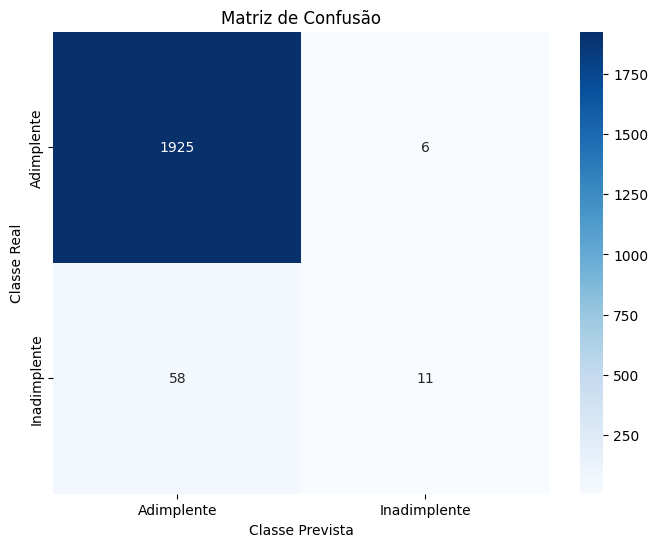

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

mat_conf_lda = confusion_matrix(y_teste, y_pred_lda)

# Defina os rótulos das classes
class_names = ['Adimplente', 'Inadimplente']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf_lda, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


O problema na classe de inadimplentes permanece, ainda só 11 de 69 foram classificados corretamente. Podemos confirmar isso olhando para o relatório de classificação:

In [40]:
rel_class = classification_report(y_teste, y_pred_lda)

print(f"Relatório de Classificação:\n{rel_class}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1931
           1       0.65      0.16      0.26        69

    accuracy                           0.97      2000
   macro avg       0.81      0.58      0.62      2000
weighted avg       0.96      0.97      0.96      2000



Aqui, podemos ver que, mesmo que haja uma maior precisão da classe minoritária (inadimplentes) ainda temos um problema enorme com o recall, gerando uma alta taxa de falsos negativos. Isto é, inadimplentes que estão sendo classificados como adimplentes. Também é sempre importante olhar para o F1-score, que é a média harmonica de precision e recall. Aqui, vemos que o F1-score para a classe 1 (inadimplentes) é baixíssimo (0,26), lembrando que todas estas medidas variam de 0 a 1.

#### Quadratic Discriminant Analysis (QDA)

O QDA é um método estatístico que, assim como o LDA, é usado para separar dados em diferentes classes com base em suas características. No entanto, o QDA assume que as classes têm diferentes matrizes de covariância. Agora, vamos quebrar isso em partes:

* Matrizes de Covariância Diferentes: O QDA parte do pressuposto de que as diferentes classes em seus dados podem ter dispersões diferentes em várias direções. Isso significa que as variâncias e covariâncias (como a relação entre duas características) entre as classes podem ser diferentes.

* Classificação com Superfícies Não-Lineares: Devido à suposição de matrizes de covariância diferentes, o QDA é capaz de modelar relações mais complexas entre as classes. Isso significa que ele pode capturar fronteiras de decisão não-lineares, permitindo maior flexibilidade na classificação. (Nota: Lembre-se que modelos mais flexíveis tem suas vantagens e desvantagens).

* Processo de Treinamento: O treinamento do QDA envolve calcular as matrizes de covariância para cada classe. Isso é feito estimando a matriz de covariância de cada classe com base nos dados de treinamento. Em seguida, o modelo usa essas informações para calcular as probabilidades de pertencimento de uma nova amostra a cada classe.

* Tomada de Decisões: Quando você deseja classificar uma nova amostra de dados, o QDA calcula a probabilidade de pertencimento a cada classe com base nas matrizes de covariância estimadas e usa essas probabilidades para fazer a classificação final. A classe com a maior probabilidade é a classe prevista.

Em resumo, o QDA é uma técnica de classificação que leva em consideração a variabilidade das classes, permitindo que o modelo se adapte a relações não-lineares entre os dados. Isso pode ser útil quando as classes têm diferentes padrões de dispersão e quando as fronteiras de decisão não são estritamente lineares.

1. Importando o modelo:

In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

2. Criando o objeto e treinando o modelo:

In [42]:
# Crie e treine o modelo QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_treino, y_treino)

QuadraticDiscriminantAnalysis()

3. Prevendo no banco de teste

In [43]:
# Faça previsões no conjunto de teste
y_pred_qda = qda.predict(X_teste)

y_pred_qda

array([0, 0, 0, ..., 0, 0, 0])

4. Avaliando o desempenho do modelo:

Agora, tente pensar sozinho um pouco sobre a performance do modelo, e compare os resultados com os outros dois modelos.

a) Acurácia

In [44]:
# Avalie o desempenho do modelo
accuracy = accuracy_score(y_teste, y_pred_qda)

print(f"Acurácia: {accuracy}")

Acurácia: 0.9675


b) Matriz de Confusão

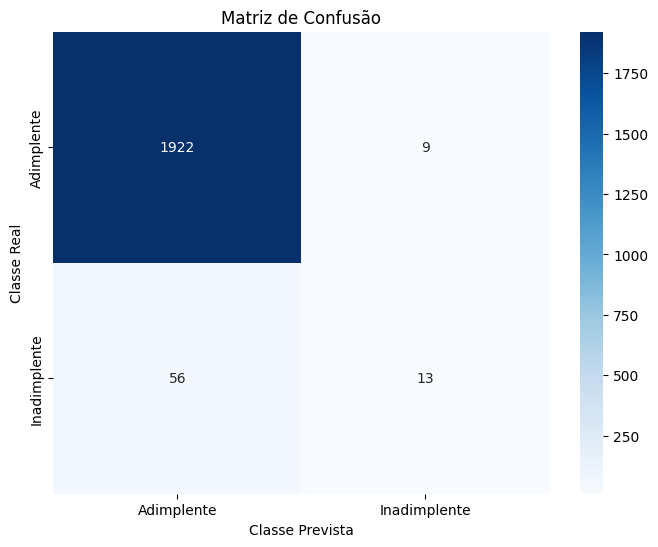

In [45]:
mat_conf_qda = confusion_matrix(y_teste, y_pred_qda)

# Defina os rótulos das classes
class_names = ['Adimplente', 'Inadimplente']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf_qda, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

c) Relatório de Classificação

In [46]:
rel_class = classification_report(y_teste, y_pred_qda)

print(f"Relatório de Classificação:\n{rel_class}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1931
           1       0.59      0.19      0.29        69

    accuracy                           0.97      2000
   macro avg       0.78      0.59      0.63      2000
weighted avg       0.96      0.97      0.96      2000



Agora, iremos para os dois últimos modelos que veremos nesta aula: Naive Bayes e K-Neighbors:

#### Naive-Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB # Modelo Naive-Bayes

# Crie e treine o modelo Naive Bayes (Gaussian Naive Bayes)
nb_model = GaussianNB()
nb_model.fit(X_treino, y_treino)

# Faça previsões no conjunto de teste
y_pred_NB = nb_model.predict(X_teste)

# Imprimindo o array de predições

y_pred_NB


array([0, 0, 0, ..., 0, 0, 0])

a) Accuracy

In [48]:
accuracy = accuracy_score(y_teste, y_pred_NB)

print(f"Acurácia: {accuracy}")

Acurácia: 0.9655


b) Confusion Matrix

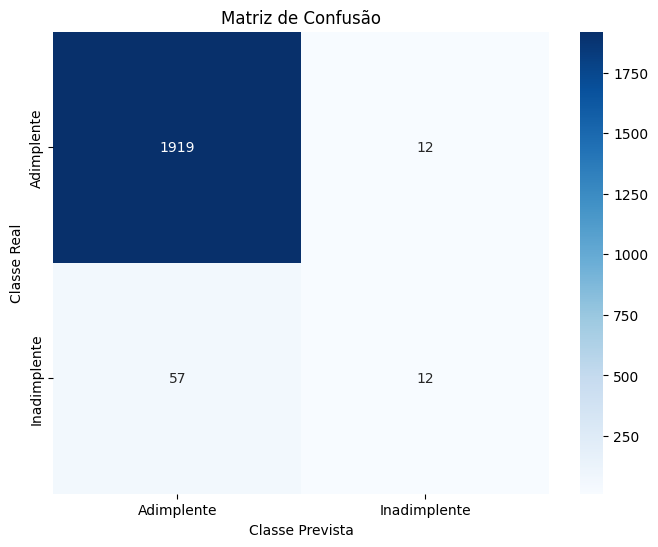

In [49]:
mat_conf_NB = confusion_matrix(y_teste, y_pred_NB)

# Defina os rótulos das classes
class_names = ['Adimplente', 'Inadimplente']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf_NB, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

#### K-Nearest Neighbors (KNN)

A ideia central do KNN é que os objetos (ou pontos de dados) que são semelhantes tendem a estar próximos uns dos outros em um espaço de características. Portanto, o KNN funciona com base na proximidade entre os pontos de dados em um espaço de características.


2. Parâmetro K:

O "K" em KNN representa o número de vizinhos mais próximos que serão considerados para tomar uma decisão. Por exemplo, se K=3, o algoritmo considerará os três vizinhos mais próximos de um ponto de dados para tomar uma decisão.

3. Classificação com KNN:

Para classificação, o KNN determina a classe de um novo ponto de dados com base na classe da maioria dos K vizinhos mais próximos.
Por exemplo, se a maioria dos K vizinhos mais próximos de um novo ponto de dados pertence à classe "A", o KNN classificará o novo ponto como "A".

4. Regressão com KNN:

Para regressão, o KNN calcula a média (ou outra medida estatística) dos valores-alvo dos K vizinhos mais próximos e usa esse valor para fazer previsões.
Por exemplo, se estamos prevendo o preço de uma casa, o KNN calculará a média dos preços das K casas mais próximas para fazer a previsão.

5. Métrica de Distância: 

O KNN usa uma métrica de distância (geralmente a distância Euclidiana) para medir a proximidade entre pontos de dados no espaço de características.
A métrica de distância determina como os pontos são comparados em termos de proximidade.

6. Escolha de K:

A escolha adequada de K é importante. Um valor muito pequeno de K pode levar a um modelo muito sensível a outliers (muito flexível), enquanto um valor muito grande de K pode tornar o modelo menos sensível a padrões sutis nos dados (muito rígido). Uma boa ideia é a de testar varios valores e ver qual performa melhor no banco de teste.

7. Treinamento do Modelo:

No treinamento, o KNN simplesmente armazena todos os pontos de dados com seus rótulos em uma estrutura de dados para que eles possam ser usados para previsões futuras.

8. Previsões:

Para fazer uma previsão com o KNN, você encontra os K vizinhos mais próximos do novo ponto de dados usando a métrica de distância.
Em seguida, toma uma decisão com base na maioria das classes (classificação) ou na média dos valores-alvo (regressão) dos vizinhos mais próximos.

Aplicações:

O KNN é usado em uma variedade de tarefas, como classificação de documentos, recomendação de produtos, diagnóstico médico, detecção de anomalias e muito mais.
Em resumo, o KNN é um método de aprendizado de máquina que faz previsões com base na proximidade entre pontos de dados em um espaço de características. Ele é simples de entender e implementar, mas a escolha apropriada de K e da métrica de distância é fundamental para seu desempenho.

In [50]:
from sklearn.neighbors import KNeighborsClassifier # Importando o KNN

# Crie e treine o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Você pode ajustar o número de vizinhos (K) aqui
knn_model.fit(X_treino, y_treino)


# Faça previsões no conjunto de teste
y_pred_knn = knn_model.predict(X_teste)

y_pred_knn


array([0, 0, 0, ..., 0, 0, 0])

In [51]:
# Avalie o desempenho do modelo
accuracy = accuracy_score(y_teste, y_pred_knn)

print(f"Acurácia: {accuracy}")

Acurácia: 0.9645


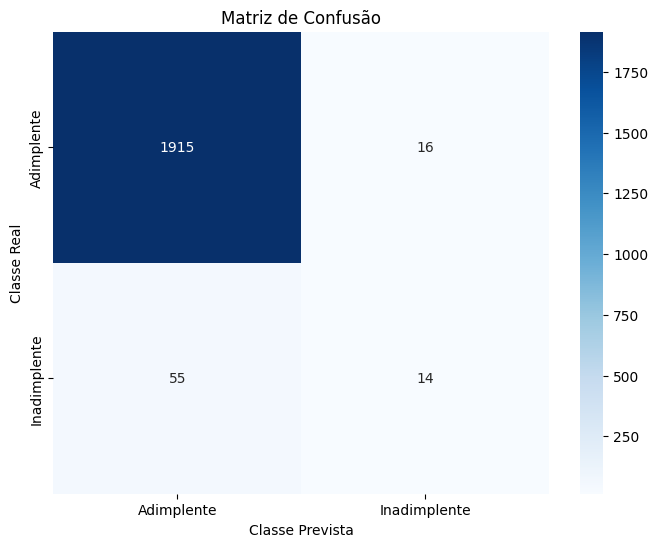

In [52]:
mat_conf_KNN = confusion_matrix(y_teste, y_pred_knn)

# Defina os rótulos das classes
class_names = ['Adimplente', 'Inadimplente']

# Crie um gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(mat_conf_KNN, # Nossa matriz gerada pelo sklearn
            annot=True,
            fmt='d', # Dígitos completos
            cmap='Blues', # Cor da matriz
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

In [53]:
report = classification_report(y_teste, y_pred_knn)

print(f"Relatório de Classificação:\n{report}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.47      0.20      0.28        69

    accuracy                           0.96      2000
   macro avg       0.72      0.60      0.63      2000
weighted avg       0.95      0.96      0.96      2000



## Exercícios

### Banco de Dados

1- Agora é sua vez, vamos pegar um outro banco de dados. Na pasta do laboratório, há um .csv chamado "Healthcare-Diabetes.csv", importe ele.

In [185]:
# Monte o drive aqui
import pandas as pd
df = pd.read_csv('Healthcare-Diabetes.csv')

In [186]:
# Imprima o banco aqui
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


No seguinte kaggle ([link](https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes/)) você encontra mais informações sobre o banco.

2 - Faça uma matriz de correlação das variáveis independentes. Há alguma variável que pareça ser muito correlacionada com outra (muito próximo de 1)?

RESPOSTA: Nenhuma variável apresenta uma correlação muito próxima de 1. No entanto, as variáveis mais correlacionadas entre si são "Age" e "Pregnancies".

<Axes: >

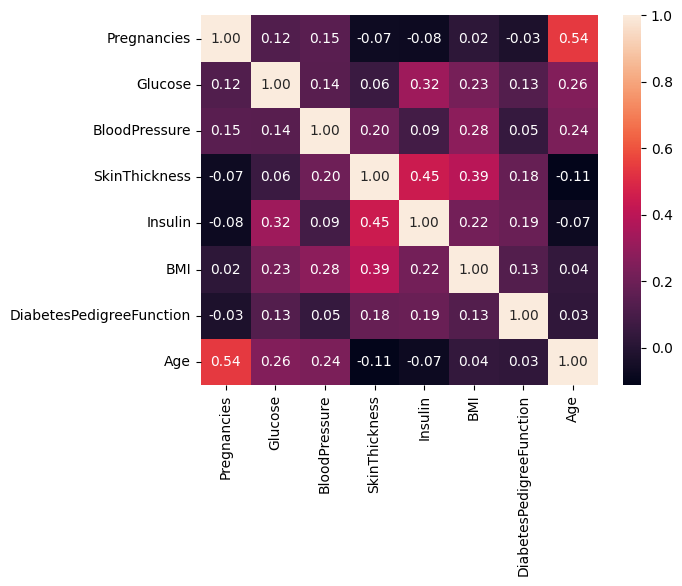

In [187]:
import seaborn as sns

vars_independentes = df.drop(columns=['Id', 'Outcome'])
matriz_corr = vars_independentes.corr()

sns.heatmap(matriz_corr, annot=True, fmt='.2f')



3 - Separe as colunas em um vetor X de features e o target (Outcome). Também separe o banco entre treino e teste (com 20% para teste).

In [188]:
x = df.drop(columns=['Id', 'Outcome'])
y = df['Outcome']

In [189]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.2, random_state=1506) 

### Regressão Logística

4 - Agora, treine um modelo de regressão logística.

In [190]:
logit_model = LogisticRegression()
logit_model.fit(treino_x, treino_y)

c:\Users\Luiz Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

5 - Faça a predição dos valores do banco de teste e imprima o array de predições.

In [191]:
y_pred_logit = logit_model.predict(teste_x)
y_pred_logit

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,

a) Apresente a acurácia:

In [192]:
logit_acuracia = accuracy_score(teste_y, y_pred_logit)

print(f'Acurácia do modelo logístico: {round(logit_acuracia, 3)}')


Acurácia do modelo logístico: 0.798


b) Apresente a matriz de confusão

In [193]:
confusion_matrix(teste_y, y_pred_logit)

array([[323,  40],
       [ 72, 119]])

c) Por fim, apresente o relatório de classificação

In [194]:
relatorio_logit = classification_report(teste_y, y_pred_logit)
print(relatorio_logit)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       363
           1       0.75      0.62      0.68       191

    accuracy                           0.80       554
   macro avg       0.78      0.76      0.77       554
weighted avg       0.79      0.80      0.79       554



d) O modelo foi bem? Comente sobre

RESPOSTA: O modelo, no geral, acerta 80% das previsões, o que pode ser considerado um resultado razoável. No entanto, o modelo é melhor para prever a classe "0" (não tem diabetes) do que a classe "1" (tem diabetes). Analisando as métricas, podemos perceber que a principal dificuldade do modelo é identificar os casos em que o paciente tem diabetes, uma vez que o recall dessa classe é bastante baixo: 0.62.

e) Agora, vamos pegar esses valores do relatório de classificação de forma separada, isso vai ser útil depois. Pegue precision, recall e f1-score e salve-os em uma variável com nome adequado para depois. Imprima os valores e veja se batem com o do relatório de classificação. Dica: [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)

In [195]:
# Dica:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(teste_y, y_pred_logit, average=None, labels=[0, 1])

relatorio_logit_df = pd.DataFrame({
    'model':'logit',
    'precision':precision,
    'recall':recall,
    'f1':f1,
    'support':support
})

relatorio_logit_df


,model,precision,recall,f1,support
0,logit,0.817722,0.889807,0.852243,363
1,logit,0.748428,0.623037,0.680000,191


### LDA

6 - Agora, treine um modelo LDA e faça as predições no banco de teste.

In [196]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(treino_x, treino_y)
y_pred_lda = lda_model.predict(teste_x)

a) Apresente a acurácia

In [197]:
lda_acuracia = accuracy_score(teste_y, y_pred_lda)
print(f'Acurácia do LDA: {round(lda_acuracia, 3)}')

Acurácia do LDA: 0.792


b) Apresente a matriz de confusão:

In [198]:
confusion_matrix(teste_y, y_pred_lda)

array([[321,  42],
       [ 73, 118]])

c) Por fim, o relatório de classificação. Os resultados são melhores do que o da regressão logística? Comente sobre.

RESPOSTA: Essencialmente, os resultados são os mesmos. 

In [199]:
relatorio_lda = classification_report(teste_y, y_pred_lda)
print(relatorio_lda)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       363
           1       0.74      0.62      0.67       191

    accuracy                           0.79       554
   macro avg       0.78      0.75      0.76       554
weighted avg       0.79      0.79      0.79       554



In [200]:
print(relatorio_logit)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       363
           1       0.75      0.62      0.68       191

    accuracy                           0.80       554
   macro avg       0.78      0.76      0.77       554
weighted avg       0.79      0.80      0.79       554



d) Novamente, pegue os valores separados e os salve em um novo dataframe.

In [201]:
precision, recall, f1, support = precision_recall_fscore_support(teste_y, y_pred_lda)

relatorio_lda_df = pd.DataFrame({
    'model':'LDA',
    'precision':precision,
    'recall':recall,
    'f1':f1,
    'support':support
})

relatorio_lda_df

,model,precision,recall,f1,support
0,LDA,0.814721,0.884298,0.848085,363
1,LDA,0.737500,0.617801,0.672365,191


e) Junte com o banco que você criou no exercício 5-e

In [202]:
relatorio = pd.concat([relatorio_logit_df, relatorio_lda_df], axis=0)
relatorio

,model,precision,recall,f1,support
0,logit,0.817722,0.889807,0.852243,363
1,logit,0.748428,0.623037,0.680000,191
0,LDA,0.814721,0.884298,0.848085,363
1,LDA,0.737500,0.617801,0.672365,191


### QDA

7 - Treine um modelo QDA e faça as predições no banco de teste

In [203]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(treino_x, treino_y)
y_pred_qda = qda_model.predict(teste_x)

a) Apresente o relatório de classificação

In [204]:
relatorio_qda = classification_report(teste_y, y_pred_qda)
print(relatorio_qda)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       363
           1       0.61      0.58      0.59       191

    accuracy                           0.73       554
   macro avg       0.70      0.69      0.69       554
weighted avg       0.72      0.73      0.72       554



b) Salve precisão, recall e f1-score em um dataframe

In [205]:
precision, recall, f1, support = precision_recall_fscore_support(teste_y, y_pred_qda)

relatorio_qda_df = pd.DataFrame({
    'model':'QDA',
    'precision':precision,
    'recall':recall,
    'f1':f1,
    'support':support
})

relatorio_qda_df

,model,precision,recall,f1,support
0,QDA,0.782842,0.804408,0.793478,363
1,QDA,0.607735,0.575916,0.591398,191


c) Junte com o banco de dados de resultados por modelo, criado no exercício 6-e

In [206]:
relatorio = pd.concat([relatorio, relatorio_qda_df], axis=0)
relatorio

,model,precision,recall,f1,support
0,logit,0.817722,0.889807,0.852243,363
1,logit,0.748428,0.623037,0.680000,191
0,LDA,0.814721,0.884298,0.848085,363
1,LDA,0.737500,0.617801,0.672365,191
0,QDA,0.782842,0.804408,0.793478,363
1,QDA,0.607735,0.575916,0.591398,191


### NB

8 - Treine um Modelo Naive-bayes

In [207]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(treino_x, treino_y)
y_pred_nb = naive_bayes_model.predict(teste_x)

a) Imprima o relatório de classificação

In [208]:
relatorio_nb = classification_report(teste_y, y_pred_nb)
print(relatorio_nb)


              precision    recall  f1-score   support

           0       0.79      0.80      0.79       363
           1       0.61      0.59      0.60       191

    accuracy                           0.73       554
   macro avg       0.70      0.69      0.70       554
weighted avg       0.73      0.73      0.73       554



b) Salve precision, recall e f1-score em um dataframe separado

In [209]:
precision, recall, f1, support = precision_recall_fscore_support(teste_y, y_pred_nb)

relatorio_nb_df = pd.DataFrame({
    'model':'Naive-Bayes',
    'precision':precision,
    'recall':recall,
    'f1':f1,
    'support':support
})

relatorio_nb_df

,model,precision,recall,f1,support
0,Naive-Bayes,0.786486,0.801653,0.793997,363
1,Naive-Bayes,0.608696,0.586387,0.597333,191


c) Junte com o dataframe de resultados dos outros modelos

In [210]:
relatorio = pd.concat([relatorio, relatorio_nb_df], axis=0)
relatorio

,model,precision,recall,f1,support
0,logit,0.817722,0.889807,0.852243,363
1,logit,0.748428,0.623037,0.680000,191
0,LDA,0.814721,0.884298,0.848085,363
1,LDA,0.737500,0.617801,0.672365,191
0,QDA,0.782842,0.804408,0.793478,363
1,QDA,0.607735,0.575916,0.591398,191
0,Naive-Bayes,0.786486,0.801653,0.793997,363
1,Naive-Bayes,0.608696,0.586387,0.597333,191


### KNN

9 - Por fim, treine também um modelo KNN

In [211]:
knn_model = KNeighborsClassifier()
knn_model.fit(treino_x, treino_y)
y_pred_knn = knn_model.predict(teste_x)

a) Imprima o relatório de classificação.

In [212]:
relatorio_knn = classification_report(teste_y, y_pred_knn)
print(relatorio_knn)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       363
           1       0.76      0.80      0.78       191

    accuracy                           0.84       554
   macro avg       0.82      0.83      0.83       554
weighted avg       0.84      0.84      0.84       554



b) Salve precision, recall e f1-score em um dataframe separado

In [213]:
precision, recall, f1, support = precision_recall_fscore_support(teste_y, y_pred_knn)

relatorio_knn_df = pd.DataFrame({
    'model':'KNN',
    'precision':precision,
    'recall':recall,
    'f1':f1,
    'support':support
})

relatorio_knn_df

,model,precision,recall,f1,support
0,KNN,0.889518,0.865014,0.877095,363
1,KNN,0.756219,0.795812,0.775510,191


c) Por fim, junte estes resultados com o dataframe completo de resultados

In [222]:
relatorio = pd.concat([relatorio, relatorio_knn_df], axis=0)
relatorio

,model,precision,recall,f1,support
0,logit,0.817722,0.889807,0.852243,363
1,logit,0.748428,0.623037,0.680000,191
0,LDA,0.814721,0.884298,0.848085,363
1,LDA,0.737500,0.617801,0.672365,191
0,QDA,0.782842,0.804408,0.793478,363
1,QDA,0.607735,0.575916,0.591398,191
0,Naive-Bayes,0.786486,0.801653,0.793997,363
1,Naive-Bayes,0.608696,0.586387,0.597333,191
0,KNN,0.889518,0.865014,0.877095,363
1,KNN,0.756219,0.795812,0.775510,191


Comparação dos modelos

10 - Pegue o dataframe criado em 9-c e drope as colunas de suporte. Depois, transforme do formato wide para o formato long.

In [224]:
relatorio_long = relatorio.drop(columns='support').copy()
relatorio_long


,model,precision,recall,f1
0,logit,0.817722,0.889807,0.852243
1,logit,0.748428,0.623037,0.680000
0,LDA,0.814721,0.884298,0.848085
1,LDA,0.737500,0.617801,0.672365
0,QDA,0.782842,0.804408,0.793478
1,QDA,0.607735,0.575916,0.591398
0,Naive-Bayes,0.786486,0.801653,0.793997
1,Naive-Bayes,0.608696,0.586387,0.597333
0,KNN,0.889518,0.865014,0.877095
1,KNN,0.756219,0.795812,0.775510


In [228]:
relatorio_long.index.name = 'classe'
relatorio_long = relatorio_long.reset_index()
relatorio_long

,classe,model,precision,recall,f1
0,0,logit,0.817722,0.889807,0.852243
1,1,logit,0.748428,0.623037,0.680000
2,0,LDA,0.814721,0.884298,0.848085
3,1,LDA,0.737500,0.617801,0.672365
4,0,QDA,0.782842,0.804408,0.793478
5,1,QDA,0.607735,0.575916,0.591398
6,0,Naive-Bayes,0.786486,0.801653,0.793997
7,1,Naive-Bayes,0.608696,0.586387,0.597333
8,0,KNN,0.889518,0.865014,0.877095
9,1,KNN,0.756219,0.795812,0.775510


In [231]:
relatorio_long = pd.melt(
    relatorio_long,
    id_vars=['classe', 'model'],
    var_name='metrics',
    value_vars=['precision', 'recall', 'f1']
)
relatorio_long

,classe,model,metrics,value
0,0,logit,precision,0.817722
1,1,logit,precision,0.748428
2,0,LDA,precision,0.814721
3,1,LDA,precision,0.737500
4,0,QDA,precision,0.782842
5,1,QDA,precision,0.607735
6,0,Naive-Bayes,precision,0.786486
7,1,Naive-Bayes,precision,0.608696
8,0,KNN,precision,0.889518
9,1,KNN,precision,0.756219


11 - Filtre somente os valores referentes à precisão e faça um gráfico de barras comparando os resultados desta métrica.

In [232]:
relatorio_precisao = relatorio_long[relatorio_long['metrics'] == 'precision']
relatorio_precisao

,classe,model,metrics,value
0,0,logit,precision,0.817722
1,1,logit,precision,0.748428
2,0,LDA,precision,0.814721
3,1,LDA,precision,0.737500
4,0,QDA,precision,0.782842
5,1,QDA,precision,0.607735
6,0,Naive-Bayes,precision,0.786486
7,1,Naive-Bayes,precision,0.608696
8,0,KNN,precision,0.889518
9,1,KNN,precision,0.756219


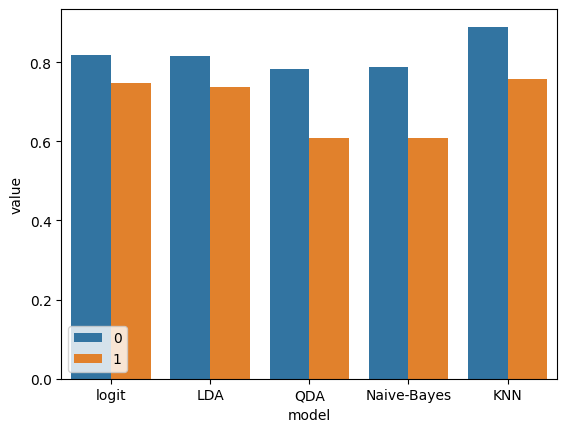

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    relatorio_precisao, 
    x = 'model',
    y = 'value',
    hue = 'classe'
    )

plt.legend(loc = 'lower left')


12 - Qual modelo se saiu melhor nesta métrica?

Resposta: Os modelos Logit e LDA apresentaram desempenho semelhante e superaram os modelos QDA e Naive-Bayes, que tiveram precisão praticamente equivalente. No entanto, o melhor desempenho foi alcançado pelo modelo KNN, que se destacou tanto na precisão da classe "0" quanto na da classe "1".

13 - Faça o mesmo do exercício 11 com o Recall (Revocação)

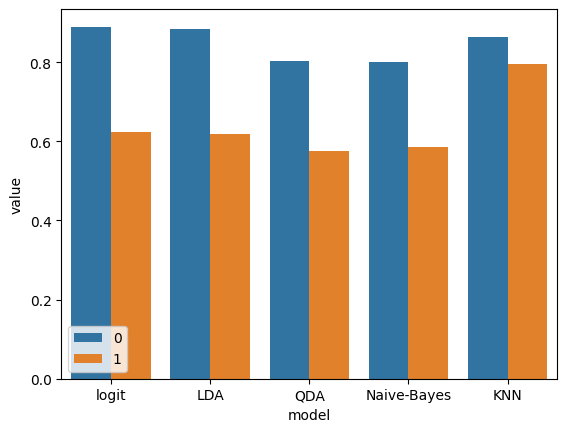

In [251]:
relatorio_recall = relatorio_long[relatorio_long['metrics'] == 'recall']

sns.barplot(
    relatorio_recall, 
    x = 'model', 
    y = 'value', 
    hue = 'classe'
    )

plt.legend(loc = 'lower left')

14 - Qual modelo tem a menor taxa de falsos negativos (maior recall)? Os resultados são parecidos até na classe minoritária?

Resposta: O modelo com o maior recall é o modelo KNN, sobretudo quando olhamos para a classe minoritária. Quando voltamos nossa atenção para a classe majoritária, o KNN apresenta um resultado praticamente idêntico aos modelos logit e LDA, embora fique um pouco para trás. 

15 - Por fim, compare os f1-scores da mesma forma.

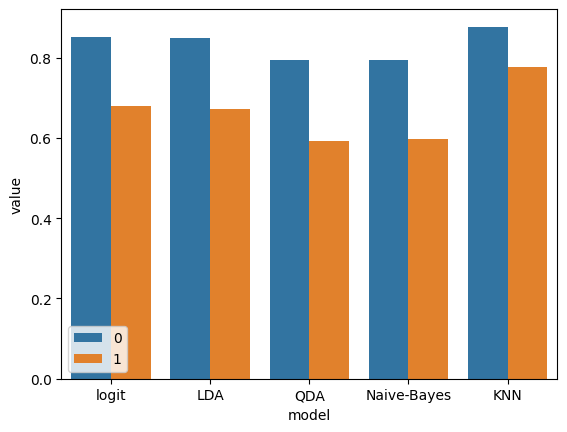

In [253]:
relatorio_fscore = relatorio_long[relatorio_long['metrics'] == 'f1']

sns.barplot(
    relatorio_fscore, 
    x = 'model', 
    y = 'value', 
    hue = 'classe'
    )

plt.legend(loc = 'lower left')

16 - Qual modelo obteve melhor desempenho nesta tarefa?

Resposta: Novamente, temos um melhor desempenho do modelo KNN, tanto para a classe minoritária quanto para a classe majoritária.